# Image Clustering

From Applied Linear Algebra &sect;4.4.

In [1]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("homework")

In [27]:
from pathlib import Path
from principal_components import load_training_data

data_dir = Path.home() / "data/Faces"
face_images, face_labels, face_im_shape = load_training_data(data_dir / "fa_H")

In [3]:
imgs, digits = load_digits(return_X_y=True)
im_shape = (8, 8)

In [38]:
def display_5_imgs(nrows, images, im_shape, digits=True):
    """plot images in a nrow by 5 array.

    Args:
        nrows ([type]): [description]
        images (ndarray): expects image shape for be formatted square. 
    """
    _, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(10, 10))
    for idx, image in zip(range(5 * nrows), images):
        if nrows == 1:
            ax = axes[idx]
        else:
            ax = axes[idx // 5, idx % 5]
        ax.set_axis_off()
        if digits:
            ax.imshow(image.reshape(im_shape), cmap=plt.cm.gray_r, interpolation='nearest')
        else: 
            ax.imshow(image.reshape(im_shape), interpolation='nearest')

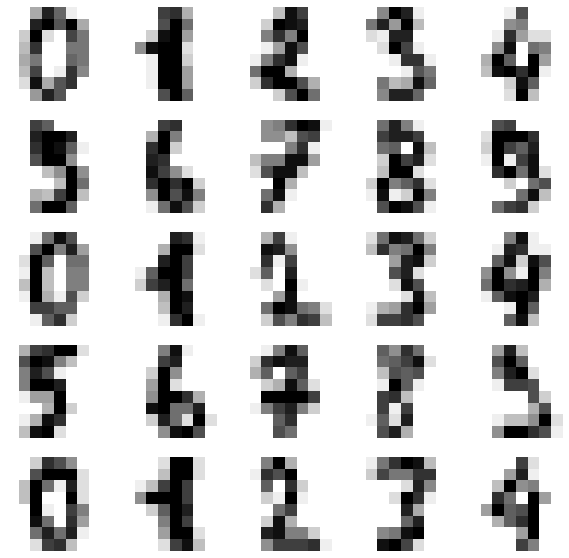

In [39]:
display_5_imgs(5, imgs,im_shape)

In [40]:
km = KMeans(n_clusters=20).fit(imgs)

# display_5_imgs(4, km.cluster_centers_)

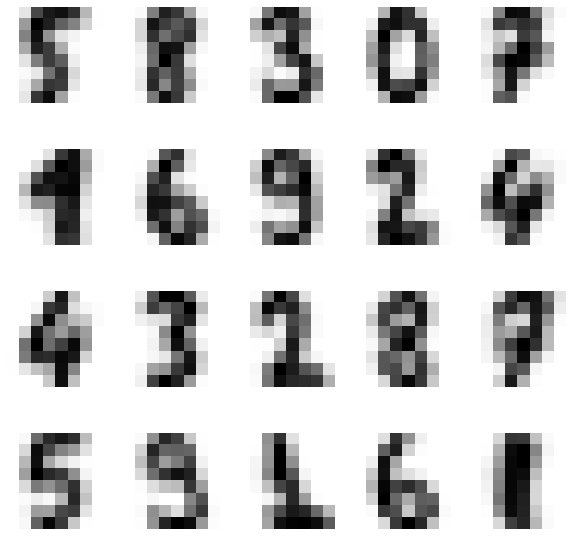

In [41]:
display_5_imgs(4, km.cluster_centers_, im_shape)

In [42]:
codebook = km.cluster_centers_.squeeze()
labels = km.labels_
# Create an array from labels and values
im_compressed = np.choose(labels.reshape(-1, 1), codebook)

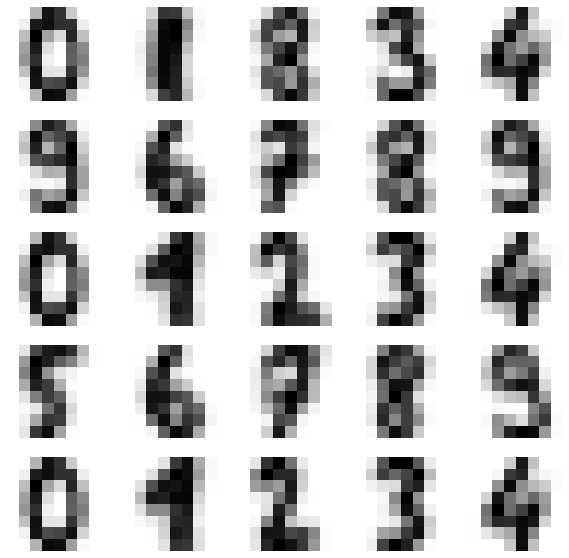

In [43]:
display_5_imgs(5, im_compressed, im_shape)

In [44]:
face_images.shape

(1204, 2880)

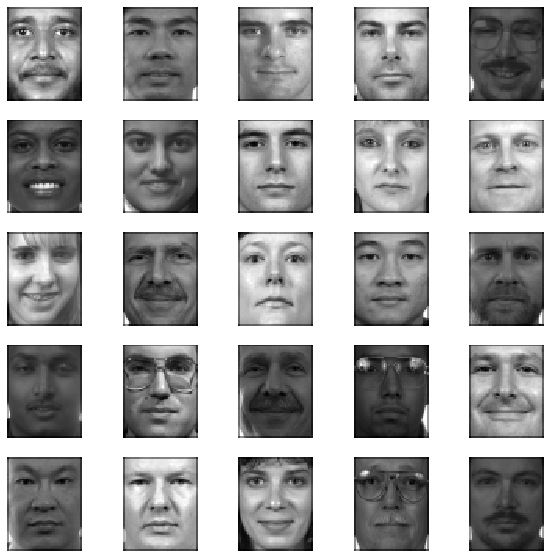

In [46]:
display_5_imgs(5, face_images, face_im_shape, digits=False)

In [55]:
faces_km = KMeans(200).fit(face_images)

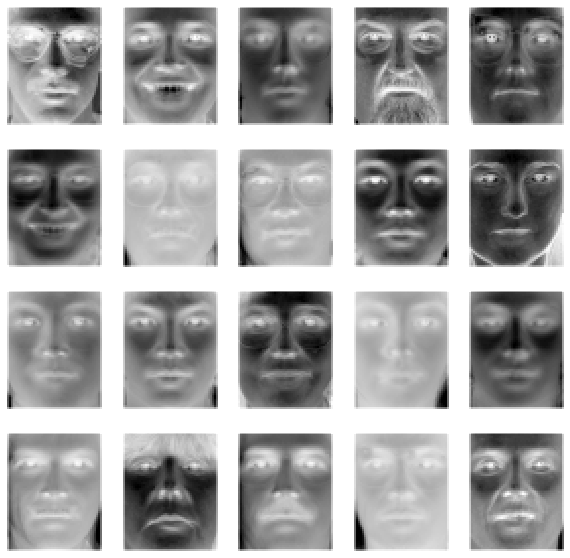

In [56]:
display_5_imgs(4, faces_km.cluster_centers_, face_im_shape)

In [ ]:
faces_codebook = faces_km.cluster_centers_.squeeze()
faces_compressed_labels = faces_km.labels_
# Create an array from labels and values
faces_compressed = np.choose(labels.reshape(-1, 1), codebook)